In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

In [3]:
%%bigquery --project bcx-insights customers_3 --verbose

SELECT *

FROM `bcx-insights.telkom_customerexperience.orders_20190926_00_anon`

WHERE DEAL_DESC = 'SmartBroadband Wireless 20GB Deal'

ORDER BY ORDER_CREATION_DATE, ACTION_CREATION_DATE, ORDER_ID_ANON

Executing query with job ID: 7e7f4a66-03f8-4d83-a1af-3806727bc6cf
Query executing: 0.30s
Query complete after 0.48s


In [4]:
customers_3.tail(3)

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,CLOSE_DATE,OPEN_CLOSE_INDIC,SOURCE,ORDER_ID_ANON,ACCOUNT_NO_ANON,MSISDN_ANON,ORDER_ACTION_ID_ANON
73963,Done,2019-09-18 21:13:41+00:00,Done,PR,Provide,2019-09-18 21:13:41+00:00,Call Center,Call Center,SmartBroadband Wireless 20GB Deal,2019-09-18 21:14:07+00:00,2019-09-18 21:14:07+00:00,C,NGN,-5452963134605644357,3553008416154642013,-8780630124271807595,-3154332177942909412
73964,Done,2019-09-18 21:16:56+00:00,Done,PR,Provide,2019-09-18 21:16:56+00:00,Call Center,Call Center,SmartBroadband Wireless 20GB Deal,2019-09-18 21:17:22+00:00,2019-09-18 21:17:22+00:00,C,NGN,-3861971997209067679,3553008416154642013,-468472096676769145,1785951227348079728
73965,Done,2019-09-18 21:17:45+00:00,Done,PR,Provide,2019-09-18 21:17:45+00:00,Call Center,Call Center,SmartBroadband Wireless 20GB Deal,2019-09-18 21:18:07+00:00,2019-09-18 21:18:07+00:00,C,NGN,4213499607793677342,3553008416154642013,-5579602106860421269,393783649302723256


In [5]:
len(customers_3)

73966

In [6]:
customers_3 = customers_3.drop_duplicates()

In [7]:
len(customers_3)

63952

In [8]:
customers_3['MSISDN_ANON'] = customers_3['MSISDN_ANON'].astype(str)

In [9]:
unique_col = 'ORDER_ID_ANON'

In [10]:
customers_3['stage'] = customers_3.groupby(unique_col).cumcount()+1

In [11]:
customers_3['stage'] = customers_3['stage'].astype(str)

In [12]:
customers_3['ActionType_OrderStatus'] = customers_3['ACTION_TYPE_DESC'] +' * '+ customers_3['ORDER_STATUS_DESC'] 

In [13]:
type_status = list(customers_3['ActionType_OrderStatus'].unique())

In [14]:
customers_3['stage_ActionType_OrderStatus'] = customers_3['stage'] +') * '+ customers_3['ACTION_TYPE_DESC'] +' * '+ customers_3['ORDER_STATUS_DESC'] 

In [15]:
customers_3.tail(3)

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,CLOSE_DATE,OPEN_CLOSE_INDIC,SOURCE,ORDER_ID_ANON,ACCOUNT_NO_ANON,MSISDN_ANON,ORDER_ACTION_ID_ANON,stage,ActionType_OrderStatus,stage_ActionType_OrderStatus
73963,Done,2019-09-18 21:13:41+00:00,Done,PR,Provide,2019-09-18 21:13:41+00:00,Call Center,Call Center,SmartBroadband Wireless 20GB Deal,2019-09-18 21:14:07+00:00,2019-09-18 21:14:07+00:00,C,NGN,-5452963134605644357,3553008416154642013,-8780630124271807595,-3154332177942909412,1,Provide * Done,1) * Provide * Done
73964,Done,2019-09-18 21:16:56+00:00,Done,PR,Provide,2019-09-18 21:16:56+00:00,Call Center,Call Center,SmartBroadband Wireless 20GB Deal,2019-09-18 21:17:22+00:00,2019-09-18 21:17:22+00:00,C,NGN,-3861971997209067679,3553008416154642013,-468472096676769145,1785951227348079728,1,Provide * Done,1) * Provide * Done
73965,Done,2019-09-18 21:17:45+00:00,Done,PR,Provide,2019-09-18 21:17:45+00:00,Call Center,Call Center,SmartBroadband Wireless 20GB Deal,2019-09-18 21:18:07+00:00,2019-09-18 21:18:07+00:00,C,NGN,4213499607793677342,3553008416154642013,-5579602106860421269,393783649302723256,1,Provide * Done,1) * Provide * Done


In [16]:
customers = list(customers_3[unique_col].unique())

In [17]:
sorted_df = customers_3.sort_values('stage', ascending=False).head(3)
sorted_df.head()

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,CLOSE_DATE,OPEN_CLOSE_INDIC,SOURCE,ORDER_ID_ANON,ACCOUNT_NO_ANON,MSISDN_ANON,ORDER_ACTION_ID_ANON,stage,ActionType_OrderStatus,stage_ActionType_OrderStatus
25079,Done,2019-07-06 11:04:43+00:00,Done,PR,Provide,2019-07-06 11:04:43+00:00,Call Center,Call Center,SmartBroadband Wireless 20GB Deal,2019-07-06 11:40:33+00:00,2019-07-06 11:40:33+00:00,C,NGN,534054793263945555,1612443932842656633,4103364350320324992,-7082338567608815847,7,Provide * Done,7) * Provide * Done
25078,Done,2019-07-06 11:04:43+00:00,Done,PR,Provide,2019-07-06 11:04:43+00:00,Call Center,Call Center,SmartBroadband Wireless 20GB Deal,2019-07-06 11:40:33+00:00,2019-07-06 11:40:33+00:00,C,NGN,534054793263945555,1612443932842656633,7318006168441282118,-2975044637407197719,6,Provide * Done,6) * Provide * Done
48481,Done,2019-08-14 14:15:45+00:00,Done,PR,Provide,2019-08-14 14:15:45+00:00,Call Center,Call Center,SmartBroadband Wireless 20GB Deal,2019-08-16 14:40:38+00:00,2019-08-16 14:40:38+00:00,C,NGN,5834177311676859304,-4490557944858168522,-8818064735780512688,494801825042585798,6,Provide * Done,6) * Provide * Done


In [18]:
len(customers_3[customers_3['stage']=='2'])

90

In [19]:
len(customers)

63811

In [20]:
# Create a networkx graph object
J = nx.Graph()

In [21]:
J.clear()

In [22]:
max_stage=max(customers_3['stage'].astype(int))
max_stage

7

In [23]:
actions = list(customers_3['stage_ActionType_OrderStatus'].unique())

In [24]:
J.add_node('DEAL',posi=(100-10,100-0), color = 'purple')

In [25]:
for i in range(1,max_stage+1):
  
  stage_actions = list(customers_3[customers_3['stage']==str(i)]['stage_ActionType_OrderStatus'].unique())
  #print(stage_actions)
  for k in range(len(stage_actions)):
    label = stage_actions[k]
    #print(label)
    label = label.split('* ',1)
    label = label[1]
    #print(label)
    height =  type_status.index(label) +1
    #print(height)
    J.add_node(stage_actions[k],posi=(100-height, 100-i))
    #print(stage_actions[k])
    #print((i,k+1))

In [26]:
J.nodes(data = True)

NodeDataView({'1) * Change Part of Replace Offer * Delivery': {'posi': (82, 99)}, '1) * Change * Negotiation': {'posi': (84, 99)}, '1) * Provide * Done': {'posi': (98, 99)}, '1) * Resume * Done': {'posi': (90, 99)}, '2) * Cease * Done': {'posi': (97, 98)}, '1) * Change Ownership * Negotiation': {'posi': (85, 99)}, '1) * Change * Completion': {'posi': (79, 99)}, 'DEAL': {'posi': (90, 100), 'color': 'purple'}, '1) * Change Part of Replace Offer * Initial': {'posi': (87, 99)}, '1) * Provide * To Be Cancelled': {'posi': (83, 99)}, '6) * Provide * Done': {'posi': (98, 94)}, '1) * Cease * Negotiation': {'posi': (81, 99)}, '1) * Change * Delivery': {'posi': (95, 99)}, '1) * Change Part of Replace Offer * Negotiation': {'posi': (86, 99)}, '4) * Provide * Done': {'posi': (98, 96)}, '2) * Provide * Delivery': {'posi': (96, 98)}, '1) * Provide * Delivery': {'posi': (96, 99)}, '1) * Change Part of Replace Offer * Completion': {'posi': (80, 99)}, '1) * Cease * Done': {'posi': (97, 99)}, '1) * Chang

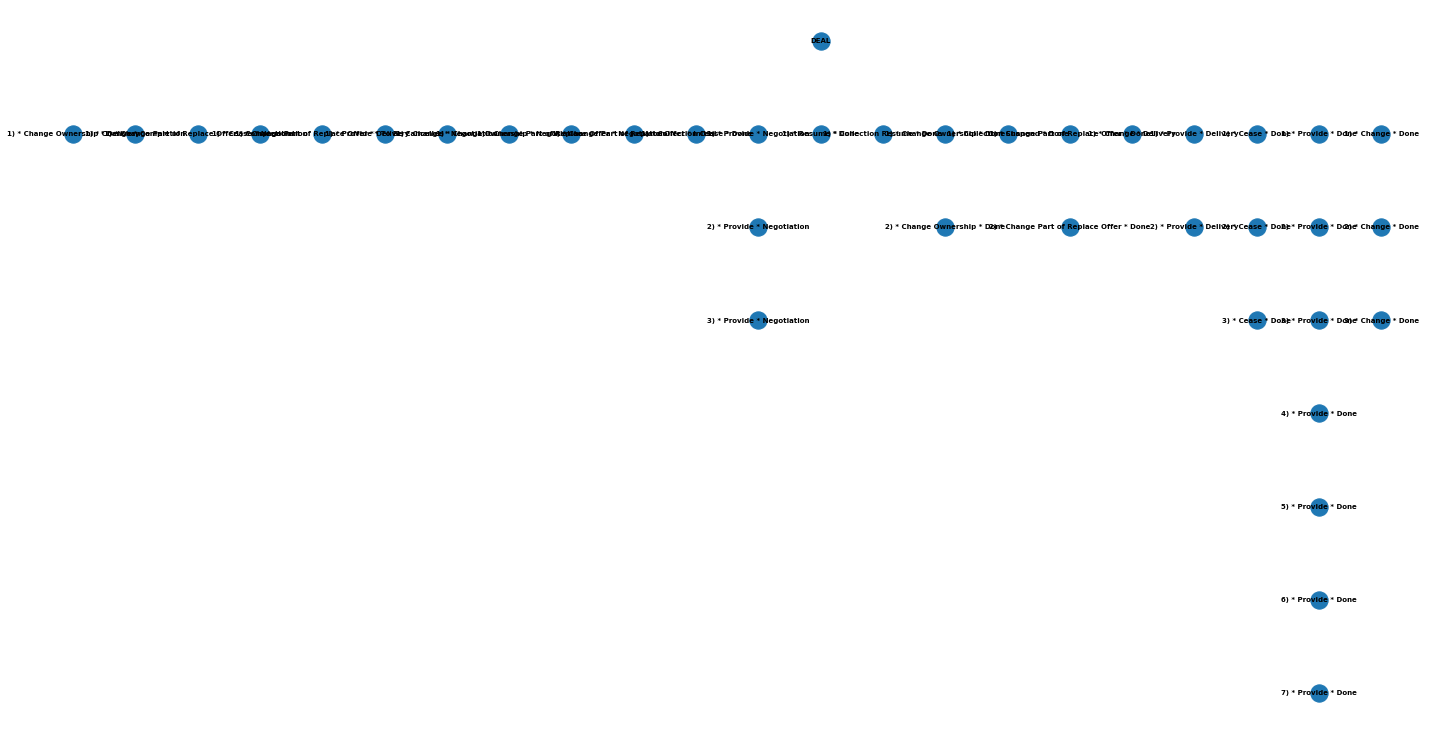

In [27]:
# Draw the resulting graph
pos = nx.get_node_attributes(J,'posi')
nx.draw(J, pos ,with_labels=True, font_weight='bold', font_size = 7)
plt.show()

In [28]:
# clear edges
J.remove_edges_from(list(J.edges()))

In [29]:
#create edges with data (count, minutes, ave_minutes)

date_col = customers_3.columns.get_loc('ACTION_CREATION_DATE')

for c in customers:

    temp_df = customers_3[customers_3[unique_col] == c]
  
    for i in range(len(temp_df)-1):
        #print(i, c)
        if J.has_edge(temp_df.iloc[i, -1], temp_df.iloc[(i+1),-1]) == False:
          #print(temp_df.iloc[i, -1], temp_df.iloc[(i+1),-1])
          #print(temp_df.iloc[i,-4], temp_df.iloc[(i+1),-4])
          J.add_edge(temp_df.iloc[i, -1], temp_df.iloc[(i+1),-1])
          J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'] = 1
          difference = (temp_df.iloc[(i+1),date_col]-temp_df.iloc[i, date_col])
          J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['minutes'] = round(difference.total_seconds()/(60),1)
          J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['ave_minutes'] = round(J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['minutes']/ J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'],1)

        else:
          current_count = J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count']
          J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'] = current_count + 1

          current_minutes =  J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['minutes']
          difference = (temp_df.iloc[(i+1),date_col]-temp_df.iloc[i, date_col])
          J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['minutes'] = round(current_minutes + difference.total_seconds()/(60),1)

          current_ave_minutes =  J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['ave_minutes'] = round(J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['minutes']/ J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'],1)

In [30]:
J.edges()

EdgeView([('1) * Provide * Done', '2) * Provide * Done'), ('2) * Cease * Done', '3) * Cease * Done'), ('2) * Cease * Done', '1) * Cease * Done'), ('7) * Provide * Done', '6) * Provide * Done'), ('1) * Provide * To Be Cancelled', '2) * Provide * Delivery'), ('1) * Provide * To Be Cancelled', '2) * Provide * Negotiation'), ('3) * Provide * Done', '4) * Provide * Done'), ('3) * Provide * Done', '2) * Provide * Done'), ('3) * Provide * Negotiation', '2) * Provide * Negotiation'), ('1) * Change Part of Replace Offer * Done', '2) * Change Part of Replace Offer * Done'), ('2) * Change * Done', '1) * Change * Done'), ('2) * Change * Done', '3) * Change * Done'), ('2) * Change Ownership * Done', '1) * Change Ownership * Done'), ('1) * Provide * Negotiation', '2) * Provide * Negotiation'), ('5) * Provide * Done', '6) * Provide * Done'), ('5) * Provide * Done', '4) * Provide * Done')])

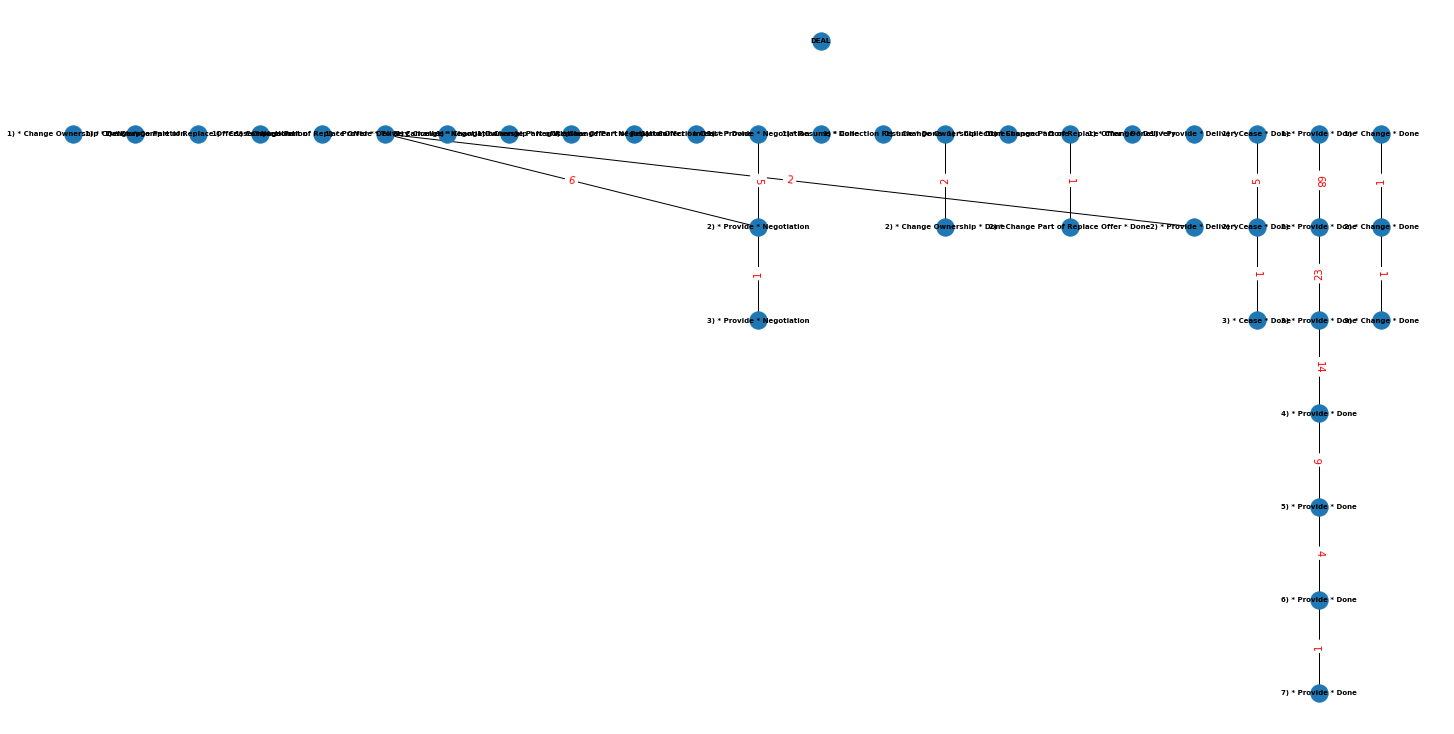

In [31]:
# Draw the resulting graph
#pos = nx.circular_layout(J)
pos = nx.get_node_attributes(J,'posi')
nx.draw(J,pos, with_labels=True, font_weight='bold', font_size = 7
        #, arrowstyle='->',arrowsize=15
       )

edge_labels = nx.get_edge_attributes(J, 'count')
nx.draw_networkx_edge_labels(J,pos,edge_labels=edge_labels,font_color='red')


plt.show()

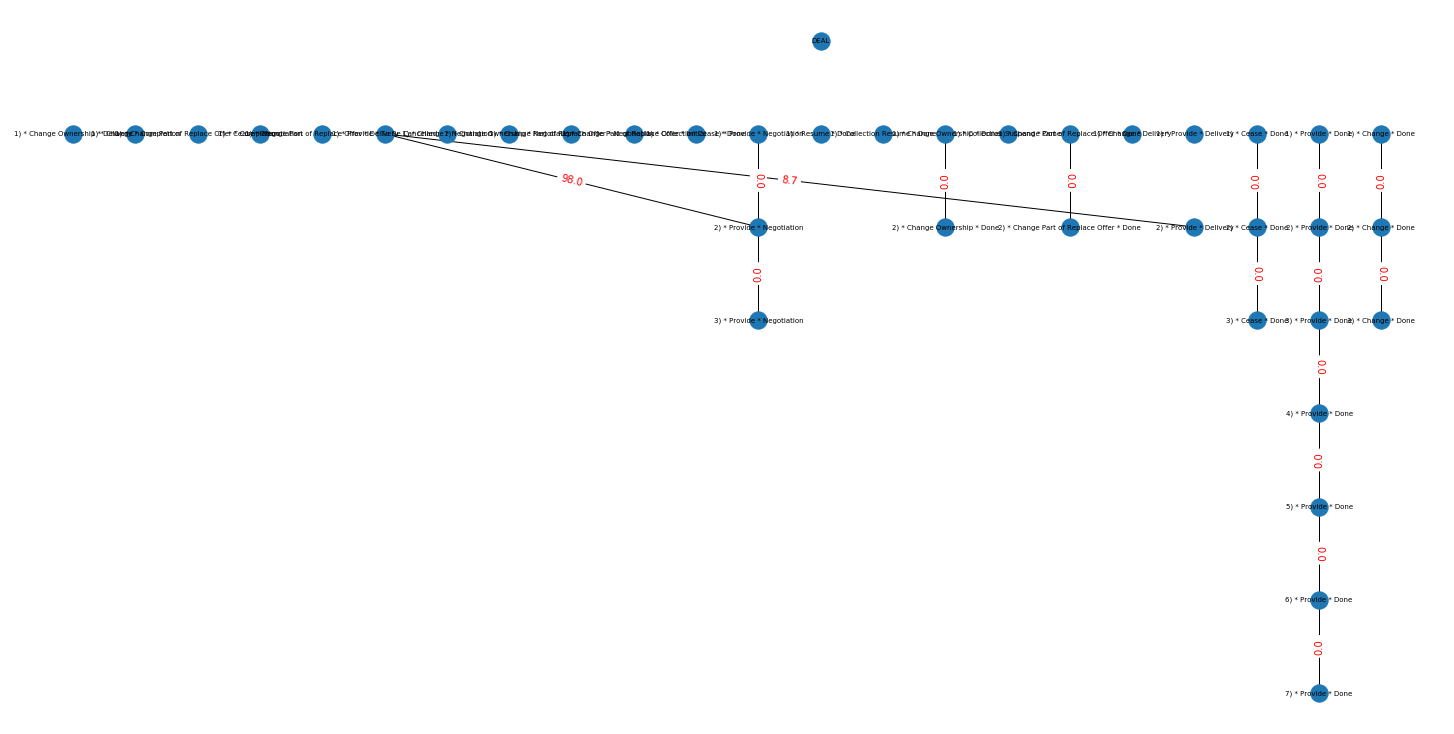

In [32]:
# Draw the resulting graph
#pos = nx.circular_layout(J)
pos = nx.get_node_attributes(J,'posi')
nx.draw(J,pos, with_labels=True, font_size = 7
        #, arrowstyle='->',arrowsize=15
       )

edge_labels = nx.get_edge_attributes(J, 'minutes')
nx.draw_networkx_edge_labels(J,pos,edge_labels=edge_labels,font_color='red')

plt.show()

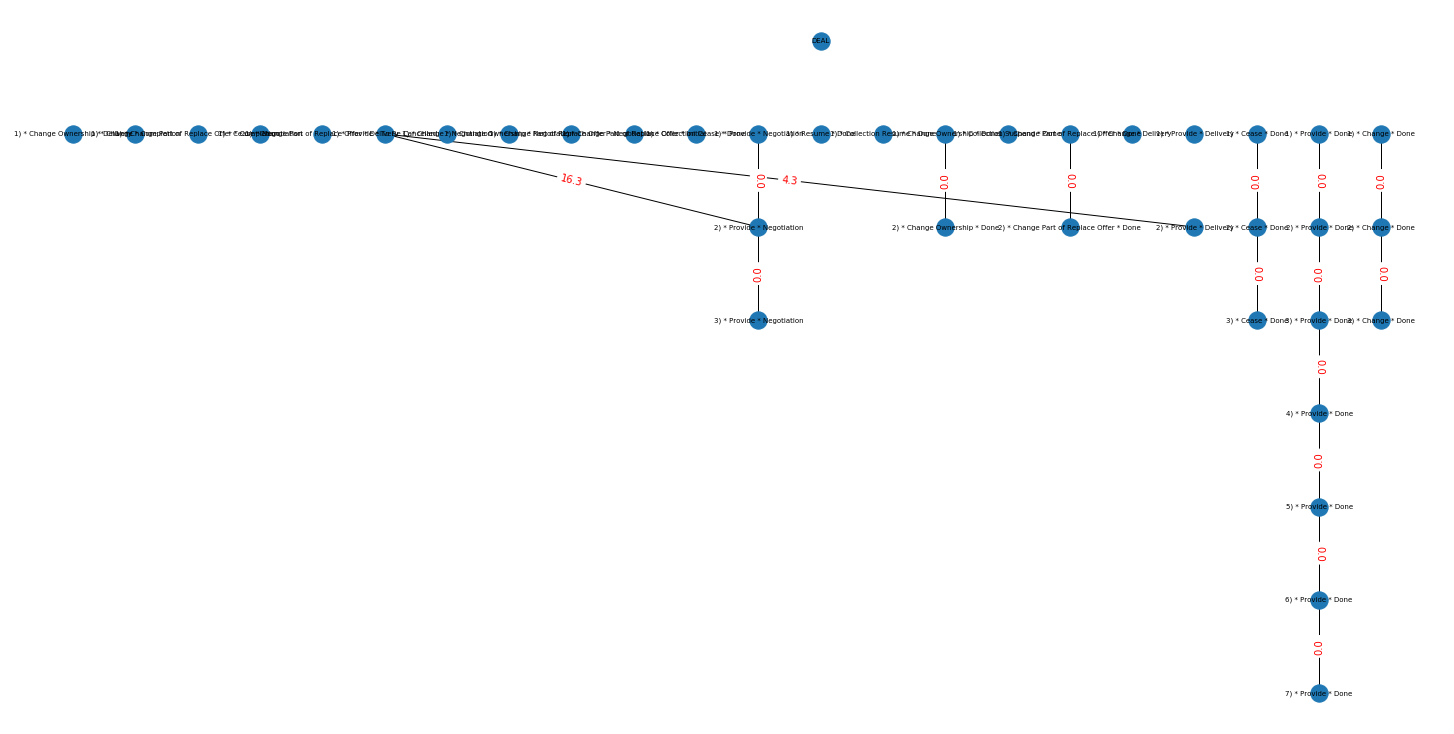

In [33]:
# Draw the resulting graph
#pos = nx.circular_layout(J)

pos = nx.get_node_attributes(J,'posi')

nx.draw(J,pos, with_labels=True, font_size=7
        #, arrowstyle='->',arrowsize=15
       )

edge_labels = nx.get_edge_attributes(J, 'ave_minutes')
nx.draw_networkx_edge_labels(J,pos,edge_labels=edge_labels,font_color='red')

plt.show()

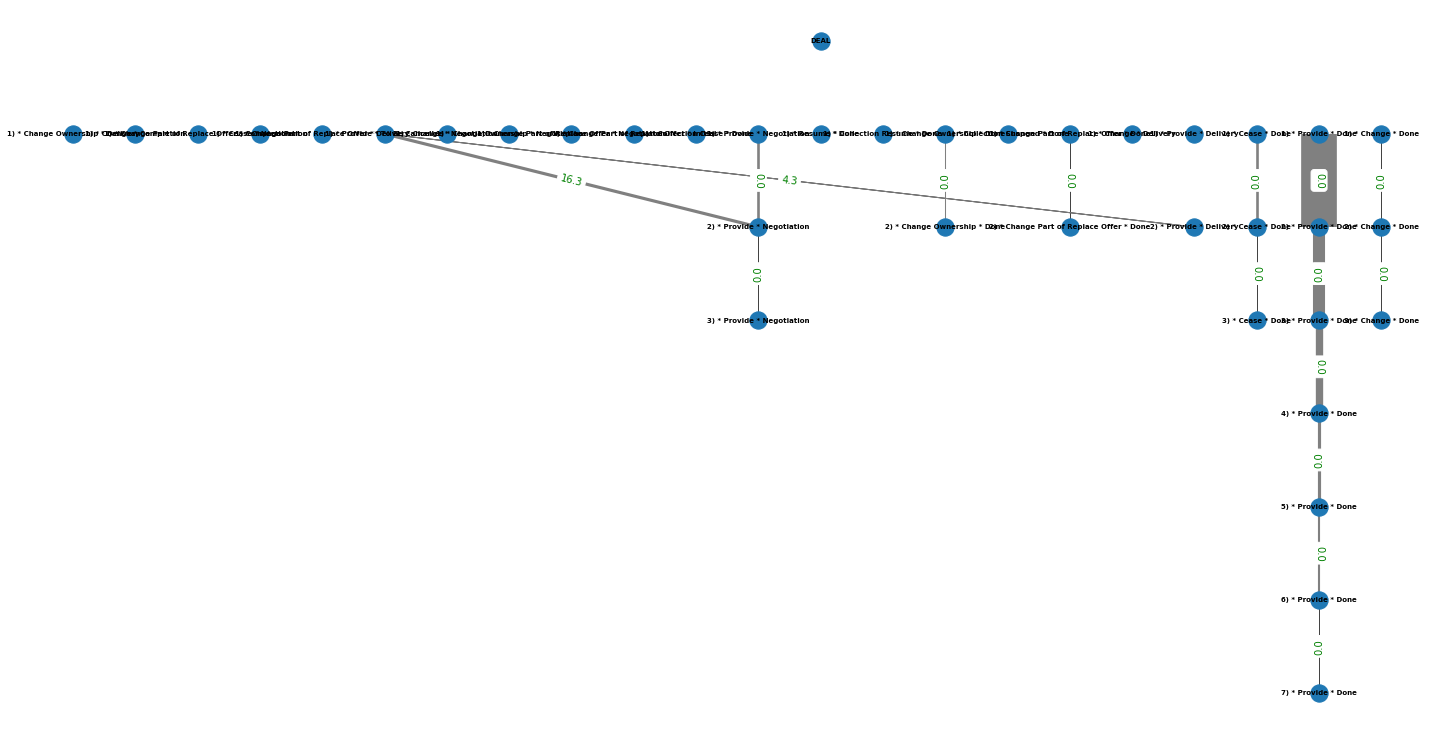

In [34]:
# Draw the resulting graph
#pos = nx.circular_layout(J)
pos = nx.get_node_attributes(J,'posi')
nx.draw(J,pos, with_labels=True, font_weight='bold', font_size = 7)

edge_labels = nx.get_edge_attributes(J, 'ave_minutes')

all_counts = []
#4 a. Iterate through the graph nodes to gather all the weights
for (node1,node2,data) in J.edges(data=True):
    all_counts.append(data['count']) #we'll use this when determining edge thickness

#4 b. Get unique weights
unique_counts = list(set(all_counts))
 
#4 c. Plot the edges - one by one!
for count in unique_counts:
        #4 d. Form a filtered list with just the weight you want to draw
        counted_edges = [(node1,node2) for (node1,node2,edge_attr) in J.edges(data=True) if edge_attr['count']==count]
        #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
        width = count*len(actions)*2/sum(all_counts)
        nx.draw_networkx_edges(J,pos,edgelist=counted_edges,width=width, edge_color = 'grey')

nx.draw_networkx_edge_labels(J,pos,edge_labels=edge_labels,font_color='green')
plt.savefig('stage_transition')
plt.show()

In [35]:
CJ = J

In [36]:
CJ.remove_nodes_from(list(nx.isolates(J)))

In [37]:
CJ.nodes(data=True)

NodeDataView({'1) * Provide * Done': {'posi': (98, 99)}, '2) * Change Ownership * Done': {'posi': (92, 98)}, '3) * Provide * Done': {'posi': (98, 97)}, '1) * Provide * To Be Cancelled': {'posi': (83, 99)}, '6) * Provide * Done': {'posi': (98, 94)}, '1) * Change Part of Replace Offer * Done': {'posi': (94, 99)}, '2) * Provide * Delivery': {'posi': (96, 98)}, '2) * Cease * Done': {'posi': (97, 98)}, '1) * Cease * Done': {'posi': (97, 99)}, '2) * Change * Done': {'posi': (99, 98)}, '1) * Provide * Negotiation': {'posi': (89, 99)}, '1) * Change Ownership * Done': {'posi': (92, 99)}, '1) * Change * Done': {'posi': (99, 99)}, '2) * Provide * Negotiation': {'posi': (89, 98)}, '5) * Provide * Done': {'posi': (98, 95)}, '3) * Cease * Done': {'posi': (97, 97)}, '2) * Change Part of Replace Offer * Done': {'posi': (94, 98)}, '7) * Provide * Done': {'posi': (98, 93)}, '3) * Provide * Negotiation': {'posi': (89, 97)}, '4) * Provide * Done': {'posi': (98, 96)}, '3) * Change * Done': {'posi': (99, 97

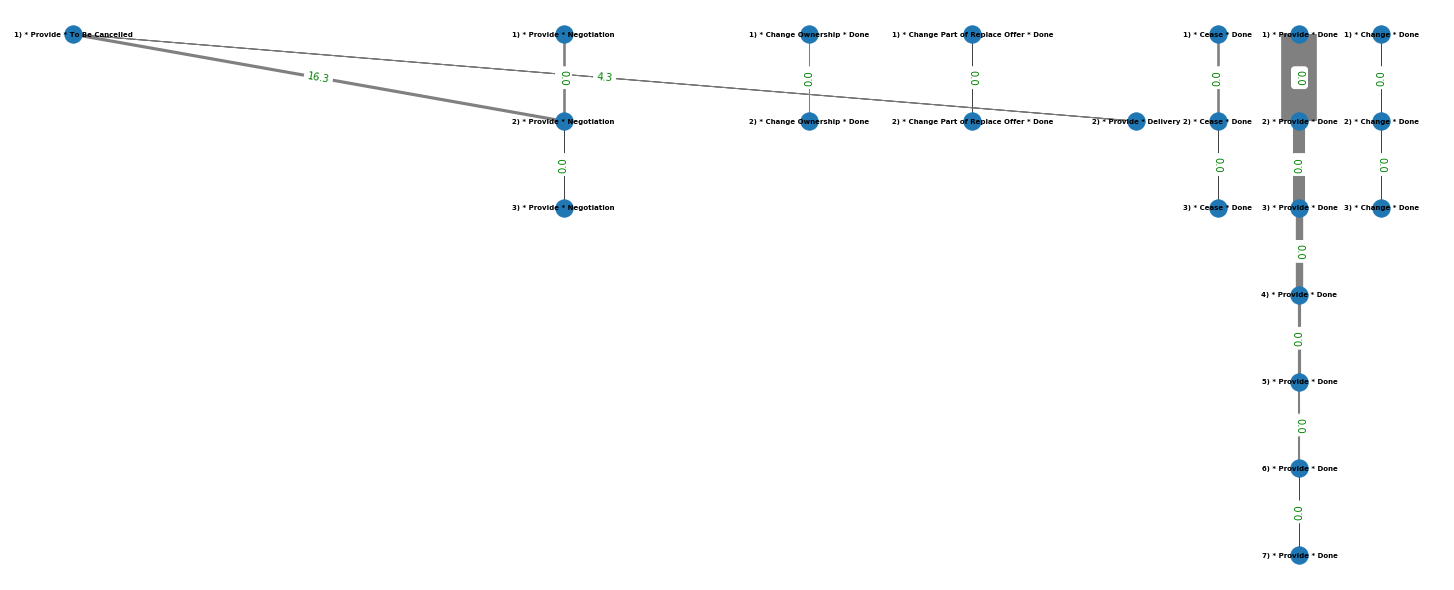

In [38]:
#CJ.add_node('dummy',posi=(0,10))

# Draw the resulting graph

plt.rcParams['figure.figsize'] = [20, 8]

pos = nx.get_node_attributes(CJ,'posi')
nx.draw(CJ,pos, with_labels=True, font_weight='bold', font_size = 7)

edge_labels = nx.get_edge_attributes(CJ, 'ave_minutes')

all_counts = []
#4 a. Iterate through the graph nodes to gather all the weights
for (node1,node2,data) in CJ.edges(data=True):
    all_counts.append(data['count']) #we'll use this when determining edge thickness

#4 b. Get unique weights
unique_counts = list(set(all_counts))
 
#4 c. Plot the edges - one by one!
for count in unique_counts:
        #4 d. Form a filtered list with CJust the weight you want to draw
        counted_edges = [(node1,node2) for (node1,node2,edge_attr) in CJ.edges(data=True) if edge_attr['count']==count]
        #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
        width = count*len(actions)*2/sum(all_counts)
        nx.draw_networkx_edges(CJ,pos,edgelist=counted_edges,width=width, edge_color = 'grey')

nx.draw_networkx_edge_labels(CJ,pos,edge_labels=edge_labels,font_color='green')
plt.savefig('stage_transition_onlymulti')
plt.show()